# 95-865 Spring 2021 A4/B4 Quiz 1 (80 minutes)

**Please make sure that your Zoom video is *on* during the duration of the exam. Also, please make sure that you can hear the course staff make announcements (i.e., please mute yourself but please make sure your speakers/headphones/earphones/etc are on so that you can hear us say things). The exam ends at 4:30pm and we will only grade what is submitted to the official Canvas assignment submission system for Quiz 1.**

You must fill in your name and your Andrew ID for this quiz to be graded. Moreover, filling out your name and Andrew ID below will serve as your agreement with us, the course staff, that you did not collaborate with anyone on this exam and that what you submit is truly your own individual work and not that of anyone else. Violations found will result in severe penalties.

**Your name:** `REPLACE THIS WITH YOUR NAME`

**Your Andrew ID:** `REPLACE THIS WITH YOUR ANDREW ID`

**Warning: If you leave the above blank, your quiz will not be graded.**

Note that Problems 1 (no coding) and 2 (coding) can be done in either order.

## Problem 1: Some Conceptual Questions (No Coding)

In this problem, parts **(a)** and **(b)** can be done in either order.

**(a)** Consider the following collection of three text documents:

Document 1: `65673`

Document 2: `2677237`

Document 3: `614357`

Suppose that we tokenize by looking at individual characters. For example, the first document has the tokens `6`, `5`, `6`, `7`, and `3`.

**Subpart i. [4 pts]** What is the collection term frequency of `7`? Please state both the raw count answer as well as the frequency as a fraction answer.

**Your raw count answer here along with a justification of your answer:** REPLACE THIS TEXT WITH YOUR ANSWER

**Your frequency as a fraction answer here along with a justification of your answer:** REPLACE THIS TEXT WITH YOUR ANSWER

**Subpart ii. [8 pts]** Suppose that we remove all tokens that only show up in exactly 1 document. After removing these tokens, what are the term frequencies (as fractions) of the remaining tokens in document 2?

**Your answer along with a justification of your answer:** REPLACE THIS TEXT WITH YOUR ANSWER

**Subpart iii. [12 pts]** For this subpart, we use the original text documents as originally stated *without* removing any tokens (i.e., for this subpart, do not remove tokens like we did in subpart ii).

What is the PMI of `5` and `6`? To do this calculation, for any two tokens, let the probability of the two tokens co-occurring be the fraction of documents that mention both tokens. The probability of a single token showing up by itself is the fraction of documents that mention that token.

**Your answer along with a justification of your answer:** REPLACE THIS TEXT WITH YOUR ANSWER

**(b) [12 pts across subparts]** Suppose that we transform the text data somehow (precisely how is not important for this problem) into a feature vector representation with **2738** features. We then fit a **500**-dimensional PCA model on it. Below we show the plot for the total proportion of variance explained (abbreviated as "total variance explained" in the plot) as a function of how many of the top PCA components we keep. (In case this plot is not correctly displaying in your Jupyter notebook, we have also included it as the file `mystery_image.png`.)

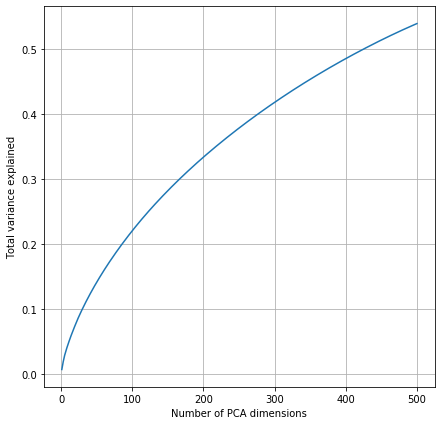

**Subpart i. [4 pts]** Roughly how many PCA components are needed to explain 45% of the variance in the data?

**Your answer along with a justification of your answer:** REPLACE THIS TEXT WITH YOUR ANSWER

**Subpart ii. [4 pts]** If we already have a 500-dimensional PCA model that has been fitted to the data, do we have to re-fit the model if we instead wanted to plot the 2-dimensional PCA representation?

**Your answer along with a justification of your answer:** REPLACE THIS TEXT WITH YOUR ANSWER

**Subpart iii. [4 pts]** If we had instead fit a 2738-dimensional PCA model, what would the total explained variance be?

**Your answer along with a justification of your answer:** REPLACE THIS TEXT WITH YOUR ANSWER

## Problem 2. What Are Politicians Tweeting About? [64 points total]

In this problem, you will be analyzing data extracted back in 2016 from the social network Twitter. This dataset contains posts only from six Twitter accounts: `realDonaldTrump`, `mike_pence`, `GOP`, `HillaryClinton`, `timkaine`, `TheDemocrats`. Each tweet (a post on Twitter) has an associated screen name (the Twitter handle of the user tweeting) as well as text of the tweet.

The six screen names that we keep track of come from two political parties (Democrats and Republicans):
- Democrats: `HillaryClinton`, `timkaine`, `TheDemocrats`
- Republicans: `realDonaldTrump`, `mike_pence`, `GOP`

Let's start with some imports. **Do not import anything else from what is imported in the next cell. This problem can be solved without using any other packages.**

In [ ]:
# <------------------ DO NOT MODIFY THIS CELL! ------------------>
%matplotlib inline
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

**Loading the data.** Let's first load in the data. We've provided some code for you to do this.

For example, the 42nd tweet is by `timkaine` and has the text `"joining the morning joe crew at 7 40am to talk foreign policy amp yesterday hearing on the counter isil operation"`.

In [ ]:
# <------------------ DO NOT MODIFY THIS CELL! ------------------>
screen_names = np.load('mystery_apple.npy', allow_pickle=True)
text = np.load('mystery_cold.npy', allow_pickle=True)

In [ ]:
# <------------------ DO NOT MODIFY THIS CELL! ------------------>
print(screen_names[42])
print(text[42])

**(a) [4 pts]** As we will be comparing tweets written by Republicans vs Democrats, let's figure out labels for which tweet is by a Republican vs which tweet is by a Democrat. Write Python code that uses the variable `screen_names` to compute a new variable `labels` (a Python list) such that the i-th entry says whether the i-th screen name corresponds to a Republican or a Democrat account. Specifically, `labels[i]` should equal `'D'` if `screen_names[i]` corresponds to a Democrat account, and `'R'` if `screen_names[i]` corresponds to a Republican account. For example, since `screen_names[42]` is `timkaine`, your answer should have `labels[42]` equal to `'D'`.

In [ ]:
# <------------------- YOUR CODE HERE ----------------------------->
labels = []

**(b) [8 pts]** Write Python code that uses the variable `text` to compute a list `text_terms` such that the i-th entry of `text_terms` consists of a list that contains the individual words in `text[i]`. For example, since `text[42]` is equal to `'joining the morning joe crew at 7 40am to talk foreign policy amp yesterday hearing on the counter isil operation'`, then `text_terms[42]` should be equal to:

```
['joining',
 'the',
 'morning',
 'joe',
 'crew',
 'at',
 '7',
 '40am',
 'to',
 'talk',
 'foreign',
 'policy',
 'amp',
 'yesterday',
 'hearing',
 'on',
 'the',
 'counter',
 'isil',
 'operation']
```

Note that for each tweet, to split the tweet's text into words, simply split on spaces (for example, if `x` is a string, then `x.split()` would split it based on spaces). **Do not use spaCy.**

**Warning:** There is a slight twist! As you'll find out, some of the elements in `text` are actually not strings. For the i-th element of `text`, if `text[i]` is not a string, then your code should have `text_terms[i]` equal the empty list `[]`.

In [ ]:
# <------------------- YOUR CODE HERE ----------------------------->
text_terms = []

**(c) [8 pts]** In this part, you will analyze what people are talking about on Twitter in terms of simply counting word frequencies. Count the number of tweets by Republican accounts and separately the average number of words in a tweet by Republican accounts. Repeat this for Democrat accounts. Print out these four numbers. **Do not use spaCy.**

In [ ]:
# <------------------- YOUR CODE HERE ----------------------------->
republican_number_of_tweets = 0
democrat_number_of_tweets = 0
republican_average_number_of_words_in_tweet = 0
democrat_average_number_of_words_in_tweet = 0

# <------------------- DO NOT MODIFY THE CODE BELOW ----------------------------->
print(republican_number_of_tweets,
      democrat_number_of_tweets,
      republican_average_number_of_words_in_tweet,
      democrat_average_number_of_words_in_tweet)

**(d) [8 pts]** Compute a histogram (using `Counter`) for how often (raw count) words appear in Democrat tweets, and similarly for Republican tweets; when you compute this histogram, exclude stop words in the list provided below in the variable `stop_words`. **Do not use spaCy. Just use the raw words (i.e., do not change casing and do not lemmatize).**

In [ ]:
# DO NOT MODIFY THIS STOP WORDS LIST
stop_words = ['the','to','in','rt','of','a', 'for','and','is','on','amp','you','i','at','will','our','we','be','with','that','it','this','are','https','s','have','by','from','has','all','as','not','was','out','t','your','my','who','her','me','he','about','so','make','just''2','w','she','they','us','his','if','up','again','an','what','one','no','here','but','can','last','than','were','do','would','been','am','http','had','when','made','them','or','there','another','isil','aumf','youre']

# <------------------- YOUR CODE HERE ----------------------------->
democrat_word_counter = Counter()
republican_word_counter = Counter()

# <------------------- DO NOT MODIFY THE CODE BELOW ----------------------------->
print('[Democrat top 10]')
print('\n'.join([word + ' : {}'.format(count)
                 for word, count in democrat_word_counter.most_common()[:10]]), '\n')
print('[Republican top 10]')
print('\n'.join([word + ' : {}'.format(count)
                 for word, count in republican_word_counter.most_common()[:10]]))

**(e) [4 pts]** The word counters from the previous part are raw counts. Recall that term frequencies could alternatively be represented as fractions between 0 and 1. Using the word counters you computed in part **(d)** (these counts should not include stop words that we have provided for you in the variable `stop_words`), now compute the frequency (as fractions) versions of these term frequencies. Specifically, for each raw count, divide it by the number of times the word appears across all tweets, regardless of whether the tweet is by a Democrat or a Republican (here, if a word appears multiple times within the same tweet, we count it multiple times). Store the resulting term frequencies (as fractions) in the variables `democrat_word_frequencies_as_fractions` and `republican_word_frequencies_as_fractions`.

*Note:* One way to check if your answer is correct is by adding up all the values across your Republican and Democrat term frequencies: the sum should be 1. We have added this check for you.

In [ ]:
# <------------------- YOUR CODE HERE ----------------------------->
democrat_word_frequencies_as_fractions = Counter()  # note: you can add fractional amounts to Counter objects
republican_word_frequencies_as_fractions = Counter()

# <------------------- DO NOT MODIFY THE CODE BELOW ----------------------------->
print('Do your frequency counters sum to 1?',
      'Yes'
      if np.abs(sum(democrat_word_frequencies_as_fractions.values())
                + sum(republican_word_frequencies_as_fractions.values()) - 1) < 1e-7
      else 'No', '\n')
print('[Democrat top 10]')
print('\n'.join([word + ' : {:.5f}'.format(count)
                 for word, count in democrat_word_frequencies_as_fractions.most_common()[:10]]), '\n')
print('[Republican top 10]')
print('\n'.join([word + ' : {:.5f}'.format(count)
                 for word, count in republican_word_frequencies_as_fractions.most_common()[:10]]))

**(f) [12 pts]** Let's try a rough comparison of word frequencies: we'll look at the ratio of the **fraction of times a word is used by a Republican** divided by the **fraction of times a word is used by a Democrat**. Compute this ratio only for when the word appears in at least 100 tweets (i.e., if we add the number of times the word appears in tweets by Democrats and in tweets by Republicans, then we get at least 100) and, moreover, the word is mentioned at least once by a Democrat and also at least one by a Republican. Fill out these ratios in a Python dictionary stored in the variable `ratios`, where the keys of the Python dictionary are words that meet the above contraints, and the values of the Python dictionary are the ratios we've asked you to compute.

We have already written code that prints out the bottom 20 and the top 20 words based on the ratio (although you have to of course compute the ratios first for the code to work!).

In [ ]:
# <------------------- YOUR CODE HERE ----------------------------->
ratios = dict()

# <------------------- DO NOT MODIFY THE CODE BELOW ----------------------------->
ratio_list = sorted(ratios.items(), key=lambda x: x[1])
print('[Bottom 20]')
print("\n".join([word + ' : {:.4f}'.format(ratio) for word, ratio in ratio_list[:20]]), "\n")
print('[Top 20]')
print("\n".join([word + ' : {:.4f}'.format(ratio) for word, ratio in ratio_list[-20:][::-1]]))

For the above rankings, does the bottom 20 correspond to the words more frequently used by Republicans in comparison to Democrats, or are they the words more frequently used by Democrats in comparison to Republicans?

**Your answer along with a justification of your answer:** REPLACE THIS TEXT WITH YOUR ANSWER

Briefly comment on whether you found any of the words interesting or surprising (please keep your answer to no more than 3 sentences).

**Your answer along with a justification of your answer:** REPLACE THIS TEXT WITH YOUR ANSWER

**(g) [20 pts across subparts]** Suppose that we filter the words somehow to get of stop words as well as other words (e.g., words that appear in too few tweets are removed, and words that appear in too many tweets are also removed). *For the purposes of this problem, you will not need to know the precise details of this word filtering process to answer this problem.* After doing the filtering, we count how many words are left per tweet. These are stored in the variable `word_counts` below. For example, the 42nd tweet has number of words that remain after filtering given by `word_counts[42]` (which happens to be equal to 9).

In [ ]:
# <------------------ DO NOT MODIFY THIS CELL! ------------------>
word_counts = np.loadtxt('mystery_river.txt').astype(np.int64) # DO NOT MODIFY

**Subpart i. [8 pts]** Plot a histogram for how many words (after the filtering we have done) appear in tweets. Specifically, the x-axis should correspond to the number of words 0, 1, 2, ..., up to the maximum number of words in a tweet (according to `word_counts`). The y-axis should track the raw number of tweets.

In [ ]:
# <------------------- YOUR CODE HERE ----------------------------->

**Subpart ii. [4 pts]** Suppose that we fit a 2D PCA model on the tweet data (after doing the word filtering that we mentioned above). We find that the explained variance ratios of the top two PCA components are 0.0073 and 0.0065. The first principal component (or in terms of Python indexing, the "0-th" component) has the following top words when ranking by absolute value of weights (largest to smallest, just like in lecture):

```
thank : 0.6491
trump2016 : 0.4317
makeamericagreatagain : 0.3322
trump : -0.2150
great : 0.2038
hillary : -0.1778
donald : -0.1624
america : 0.1590
clinton : -0.1410
president : -0.0886
new : 0.0710
support : 0.0555
americafirst : 0.0552
votetrump : 0.0540
indiana : 0.0520
poll : 0.0450
obama : -0.0441
realdonaldtrump : 0.0412
join : 0.0350
trumppence16 : 0.0346
```

What fraction of tweets from Democrat accounts mention the top word `thank`? What about from Republican accounts?

In [ ]:
# <------------------- YOUR CODE HERE ----------------------------->
democrat_fraction_thank_tweets = 0
republican_fraction_thank_tweets = 0

# <------------------- DO NOT MODIFY THE CODE BELOW ----------------------------->
print(democrat_fraction_thank_tweets, republican_fraction_thank_tweets)

**Subpart iii. [8 pts]** We've precomputed the 2D PCA representation for you (the one that yields those first principal component weights you saw in subpart ii). Let's load it in first:

In [ ]:
# <------------------ DO NOT MODIFY THIS CELL! ------------------>
pca_representation = np.loadtxt('mystery_snowman.txt')
print(pca_representation.shape)

In particular, the i-th tweet has 2D PCA representation `pca_representation[i]`. Here's the plot:

In [ ]:
# <------------------ DO NOT MODIFY THIS CELL! ------------------>
plt.figure(figsize=(5, 5))
plt.scatter(pca_representation[:, 0], pca_representation[:, 1], alpha=0.5)  # alpha just makes points semi-transparent
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.axis('equal')

Make a version of the plot that only shows the 2D PCA representations of tweets that contain the word `thank`, and that colors the tweets from Democrats vs Republicans in two different colors.

In [ ]:
# <------------------- YOUR CODE HERE ----------------------------->

For the plot you made, which color corresponds to Democrats and which corresponds to Republicans?

**Your answer:** REPLACE THIS TEXT WITH YOUR ANSWER

**As a friendly reminder:** Please remember to write your name and Andrew ID at the top of this notebook; we will only grade quizzes with these filled out. Thanks.